# Итоговая работа.

In [9]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

**a)** Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

**b)** Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [97]:
import numpy as np

norm_vector = []
for el in raitings:
    norm_vector.append(np.linalg.norm(el, 2)) # Считаю с Евклидовой нормой

user_similar = []
for i, el in enumerate(raitings):
    scalar_product = np.array(el@np.delete(raitings, i, axis=0).T)
    norm_vector_cur = norm_vector[i]

    cos_similar = scalar_product/(norm_vector_cur*np.delete(norm_vector, i, axis=0))

    #восстанавливаем номерацию пользователей в соответствие с изначальной матрицей объектов-признаков
    cos_similar = cos_similar[:i].tolist()+[0]+cos_similar[i+1:].tolist()

    user_similar.append({i:cos_similar.index(np.max(cos_similar))})
user_similar

[{0: 7},
 {1: 3},
 {2: 8},
 {3: 8},
 {4: 7},
 {5: 8},
 {6: 3},
 {7: 5},
 {8: 0},
 {9: 2}]

In [119]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(raitings)
pca.transform(raitings)


array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

## Задание 2


Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

### Решение руками

$tg^2(sin(x) + cos(2x+3))=\frac{2tg(sin(x) + cos(2x+3))}{cos^2(sin(x) + cos(2x+3))}(cos(x)-2sin(2x+3))$

In [170]:
x=1
print('Decision by hands:', 2*np.tan(np.sin(x)+np.cos(2*x+3))/np.cos(np.sin(x)+np.cos(2*x+3))**2*(np.cos(x)-2*np.sin(2*x+3)))

Decision by hands: 55.385917635337854


### Решение на Python

In [177]:
# https://pythonru.com/biblioteki/sympy-v-python
import numpy as np
import sympy as sym
from sympy import cos, sin, tan

x = sym.Symbol('x')
fx = tan(sin(x)+cos(2*x+3))**2
fx_der = sym.diff(fx, x, 1)
fx_der

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [176]:
f = sym.lambdify(x, fx_der)
print('Python solution:', f(1))

Python solution: 55.385917635337854


## Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**.

In [178]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [179]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [259]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

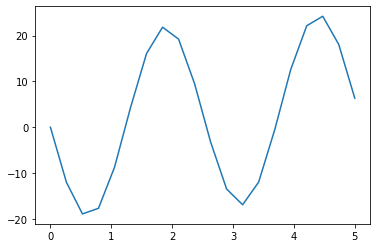

In [181]:
plt.plot(x, fx)
plt.show()

In [254]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [ ]:
# http://apmonitor.com/che263/index.php/Main/PythonOptimization
# https://stackoverflow.com/questions/42303470/scipy-optimize-inequality-constraint-which-side-of-the-inequality-is-considere/42304099

In [265]:
from scipy.optimize import minimize

mae_func = []
coef_func = []
for el in range(1000):
    x0 = np.random.uniform(-100, 100, 2)
    res = minimize(error, x0, method='nelder-mead', options={'xtol':1e-8, 'disp':False})
    mae_func.append(error(res.x))
    coef_func.append(res.x)
result = coef_func[mae_func.index(min(mae_func))]
print('MAE:', min(mae_func), '\nValue a & b:', result)


MAE: 1.8835847868103883e-06 
Value a & b: [ 3.  -2.5]


In [272]:
f(x, result[0], result[1]), fx

(array([  0.        , -12.01819069, -18.90968629, -17.68786576,
         -8.75291076,   4.27524492,  16.06801333,  21.81250205,
         19.22059839,   9.48411225,  -3.22273057, -13.48576471,
        -16.91096352, -11.95866843,  -0.58630082,  12.56873795,
         22.12489418,  24.20292137,  18.04522513,   6.3321111 ]),
 array([  0.        , -12.01819092, -18.90968634, -17.68786571,
         -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
         19.22059845,   9.48411207,  -3.22273056, -13.48576488,
        -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
         22.12489421,  24.20292139,  18.04522521,   6.33211092]))

## Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

(array([  3.,  19.,  62., 140., 206., 235., 195.,  98.,  29.,  13.]),
 array([ 6.82,  7.33,  7.84,  8.35,  8.86,  9.37,  9.88, 10.39, 10.9 ,
        11.41, 11.92]),
 <a list of 10 Patch objects>)

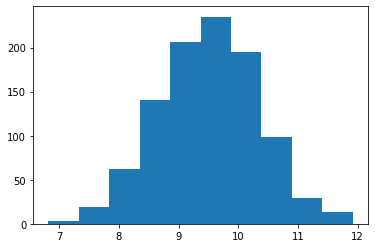

In [290]:
import matplotlib.pyplot as plt

sample_means = []
for i in range(1000):
    sample_means.append(np.random.randint(20, size=50).mean())

plt.hist(sample_means)

## Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):



```
m = np.array([[1, 4],
              [1, 1]])
print(m)
```



In [293]:
m = np.array([[1, 4],
              [1, 1]])

np.linalg.eig(m)

(array([ 3., -1.]), array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))

http://mathprofi.ru/sobstvennye_znachenija_i_sobstvennye_vektory.html

Собственные значения

$\begin{vmatrix}
  1-λ&4\\
  1&1-λ
\end{vmatrix}=0 => λ^2-2λ-3=0 =>λ_1=-1, λ_2=3$

Собственные вектора

Коэффициенты системы уравнений

$λ_1=-1$

$\begin{vmatrix}
  2&4\\
  1&2
\end{vmatrix} => x=-2y => [-2;1], $

$λ_2=3$

$\begin{vmatrix}
  -2&4\\
  1&-2
\end{vmatrix} => x=2y => [2;1]. $